In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
import os
count = 0
for root, folders, filenames in os.walk('/kaggle/input'):
   print(root, folders)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input ['ravdess-emotional-speech-audio', 'ravdess-emotional-song-audio']
/kaggle/input/ravdess-emotional-speech-audio ['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21', 'Actor_01', 'Actor_11', 'Actor_20', 'Actor_08', 'Actor_15', 'Actor_06', 'Actor_12', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_04', 'Actor_19', 'Actor_10', 'Actor_09', 'audio_speech_actors_01-24', 'Actor_14', 'Actor_03', 'Actor_13', 'Actor_18', 'Actor_07']
/kaggle/input/ravdess-emotional-speech-audio/Actor_02 []
/kaggle/input/ravdess-emotional-speech-audio/Actor_17 []
/kaggle/input/ravdess-emotional-speech-audio/Actor_05 []
/kaggle/input/ravdess-emotional-speech-audio/Actor_16 []
/kaggle/input/ravdess-emotional-speech-audio/Actor_21 []
/kaggle/input/ravdess-emotional-speech-audio/Actor_01 []
/kaggle/input/ravdess-emotional-speech-audio/Actor_11 []
/kaggle/input/ravdess-emotional-speech-audio/Actor_20 []
/kaggle/input/ravdess-emotional-speech-audio/Actor_08 []
/kaggle/input/ravdess-emotional-speech-audi

In [10]:
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Ravdess_song = "../input/ravdess-emotional-song-audio/audio_song_actors_01-24/"


dir = os.listdir(Ravdess)

dataset1 = []

        
for actor in dir:
    
    files = os.listdir(Ravdess + '/' + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
            path = (Ravdess + '/' + actor + '/' + file)
            dataset1.append([emotion, path])   
    
dir = os.listdir(Ravdess_song)

dataset2 = []

for actor in dir:
     
    try:    
        files = os.listdir(Ravdess_song + '/' + actor)

        for file in files: 

                part = file.split('.')[0]
                part = part.split("-")           

                temp = int(part[6])        

                if part[2] == '01':
                    emotion = 'neutral'
                elif part[2] == '02':
                    emotion = 'calm'
                elif part[2] == '03':
                    emotion = 'happy'
                elif part[2] == '04':
                    emotion = 'sad'
                elif part[2] == '05':
                    emotion = 'angry'
                elif part[2] == '06':
                    emotion = 'fear'
                elif part[2] == '07':
                    emotion = 'disgust'
                elif part[2] == '08':
                    emotion = 'surprise'
                else:
                    emotion = 'unknown'

                path = (Ravdess_song + '/' + actor + '/' + file)
                dataset2.append([emotion, path])   

    except:
        pass
   




#dataset1.columns = ['labels', 'path']

dataset2 = pd.DataFrame(dataset2)
#dataset2.columns = ['Emotions', 'Path']

dataset1 = pd.DataFrame(dataset1)
dataset1.head()


""


In [11]:
dataset2.columns = ['Emotions', 'Path']
dataset2.head()

,Emotions,Path
0,angry,../input/ravdess-emotional-song-audio/audio_so...
1,fear,../input/ravdess-emotional-song-audio/audio_so...
2,happy,../input/ravdess-emotional-song-audio/audio_so...
3,happy,../input/ravdess-emotional-song-audio/audio_so...
4,sad,../input/ravdess-emotional-song-audio/audio_so...


In [12]:
dataset2.describe


<bound method NDFrame.describe of      Emotions                                               Path
0       angry  ../input/ravdess-emotional-song-audio/audio_so...
1        fear  ../input/ravdess-emotional-song-audio/audio_so...
2       happy  ../input/ravdess-emotional-song-audio/audio_so...
3       happy  ../input/ravdess-emotional-song-audio/audio_so...
4         sad  ../input/ravdess-emotional-song-audio/audio_so...
...       ...                                                ...
1007     calm  ../input/ravdess-emotional-song-audio/audio_so...
1008     fear  ../input/ravdess-emotional-song-audio/audio_so...
1009  neutral  ../input/ravdess-emotional-song-audio/audio_so...
1010     calm  ../input/ravdess-emotional-song-audio/audio_so...
1011    angry  ../input/ravdess-emotional-song-audio/audio_so...

[1012 rows x 2 columns]>

In [13]:
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"


directory_list = os.listdir(Ravdess)


file_emotion = []
file_path = []

for dir in directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)


# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


In [14]:
Ravdess_df.describe

<bound method NDFrame.describe of       Emotions                                               Path
0     surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1      neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2      disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3      disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4      neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
...        ...                                                ...
1435      fear  /kaggle/input/ravdess-emotional-speech-audio/a...
1436     angry  /kaggle/input/ravdess-emotional-speech-audio/a...
1437       sad  /kaggle/input/ravdess-emotional-speech-audio/a...
1438   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
1439     angry  /kaggle/input/ravdess-emotional-speech-audio/a...

[1440 rows x 2 columns]>

In [15]:
Ravdess_df.columns

Index(['Emotions', 'Path'], dtype='object')

CREMA DATASET

Concat both the datasets

In [16]:
con = [Ravdess_df,dataset2]
result_data = pd.concat(con)

In [17]:
result_data.describe


<bound method NDFrame.describe of       Emotions                                               Path
0     surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1      neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2      disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3      disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4      neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
...        ...                                                ...
1007      calm  ../input/ravdess-emotional-song-audio/audio_so...
1008      fear  ../input/ravdess-emotional-song-audio/audio_so...
1009   neutral  ../input/ravdess-emotional-song-audio/audio_so...
1010      calm  ../input/ravdess-emotional-song-audio/audio_so...
1011     angry  ../input/ravdess-emotional-song-audio/audio_so...

[2452 rows x 2 columns]>

In [18]:
#Shuffle the dataset
result = result_data.sample(frac=1)

In [19]:
emotions = result['Emotions'].unique()
emotion_count = [0] * len(emotions)

for index,emotion in enumerate(emotions):
    emotion_count[index] = result.loc[result['Emotions'] == emotion]['Path'].count()
   
print(emotion_count)

[188, 376, 376, 376, 192, 376, 192, 376]


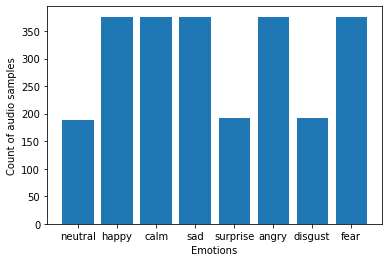

In [20]:
import matplotlib.pyplot as plt

plt.bar(emotions,emotion_count)
plt.xlabel('Emotions')
plt.ylabel('Count of audio samples')
plt.show()

In [21]:
print(emotions, emotion_count)

['neutral' 'happy' 'calm' 'sad' 'surprise' 'angry' 'disgust' 'fear'] [188, 376, 376, 376, 192, 376, 192, 376]


**Data Augmentation**

In [22]:
def add_noise(data):
    noise = np.random.randn(len(data))
    new_data = data + 0.03 * noise
    return new_data

**Feature Extraction**


In [23]:
Ravdess_df['Path'][0]

'/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-08-01-01-01-02.wav'

In [24]:
test_audio = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav'
ipd.Audio(test_audio)

ValueError: rate must be specified when data is a numpy array or list of audio samples.

In [25]:
#signal is loaded with a floating point time series with a default sampling rate of 22050(sampling rate is the number
#of samples per second in an audio signal when converting a continuous signal to a digital signal)

signal,sampling_rate = librosa.load(test_audio)
signal.shape

/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: '../input/cremad/AudioWAV/1001_DFA_FEA_XX.wav'

In [ ]:
print(signal)

In [ ]:
#Extracting MFCC's
mfcc = librosa.feature.mfcc(y=signal,n_mfcc=13,sr=sampling_rate)
mfcc.shape
#13 coefficients

In [ ]:
#Visualizing the MFCC for the first audio sample(y axis-coefficients x-axis-time)
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc,x_axis='time',sr=sampling_rate)
plt.colorbar(format='%+2f')
plt.show()

In [ ]:
mfcc = np.mean(librosa.feature.mfcc(y=signal,n_mfcc=13,sr=sampling_rate).T,axis=0)
mfcc.shape
print(mfcc)

In [ ]:
signal = add_noise(signal)
#Extracting MFCC's
mfcc = librosa.feature.mfcc(y=signal,n_mfcc=13,sr=sampling_rate)
mfcc.shape
#13 coefficients
#Visualizing the MFCC for the first audio sample(y axis-coefficients x-axis-time)
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc,x_axis='time',sr=sampling_rate)
plt.colorbar(format='%+2f')
plt.show()

In [ ]:
def mfcc_feature(data,sampling_rate):
    return np.mean(librosa.feature.mfcc(y=data,n_mfcc=40,sr=sampling_rate).T,axis=0)

In [ ]:
def mel_spectrogram_feature(data,sampling_rate):
    return np.mean(librosa.feature.melspectrogram(y=data, sr=sampling_rate).T, axis=0)

In [ ]:
def chroma(stft,sampling_rate):
    return np.mean(librosa.feature.chroma_stft(S=stft, sr=sampling_rate).T,axis=0)
    

In [ ]:
def zcr(data):
    return np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)

In [ ]:
def rms(stft):
    return np.mean(librosa.feature.rms(S=stft).T,axis=0)

In [ ]:
def tonnetz(data,sampling_rate):
    return np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(data),sr=sampling_rate).T,axis=0)

In [ ]:
def spectral_centroid(stft):
    return np.mean(librosa.feature.spectral_centroid(S=stft).T,axis=0)

In [ ]:
def spectral_bandwidth(stft):
    return np.mean(librosa.feature.spectral_bandwidth(S=stft).T,axis=0)

In [ ]:
#Feature Extraction
''' Mel Frequency Cepstral Coefficients (MFCC), Discrete Wavelet Transform (DWT),
pitch, energy and Zero crossing rate (ZCR) algorithms are used for extracting the features,MelSpectogram.'''
#function to extract the required features from the data

def feature_extraction(data,val,sampling_rate):
    features = np.array([])
    
    #Both MFCC and MelSpectrogram
    if val == 1:
    #Dataset1
        features = np.array([])
        mfcc = mfcc_feature(data,sampling_rate)
        features = np.hstack((features, mfcc))
        # MelSpectogram
        mel = mel_spectrogram_feature(data,sampling_rate)
        features = np.hstack((features, mel)) # stacking horizontally
   
    #Both MFCC and MelSpectrogram
    elif val == 2:
    #Dataset1
        features = np.array([])
        stft = np.abs(librosa.stft(data))
        
        #MFCC
        mfcc = mfcc_feature(data,sampling_rate)
        features = np.hstack((features, mfcc))
        
        # MelSpectogram
        mel = mel_spectrogram_feature(data,sampling_rate)
        features = np.hstack((features, mel)) # stacking horizontally
        
        #Chroma
        chrom = chroma(stft,sampling_rate)
        features = np.hstack((features,chrom))
        
        #tonnetz
        ton = tonnetz(data,sampling_rate)
        features = np.hstack((features,ton))
        
        contr = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sampling_rate).T,axis=0)
        features = np.hstack((features,contr))
        
    #only mfcc
    else:
        features = np.array([])
        mfcc = mfcc_feature(data,sampling_rate)
        features = np.hstack((features, mfcc))
    
    
    return features

In [ ]:
#Perform feature selection to reduce the dimensions
'''
def feature_selection(data)
    Learn more about Recursive Feature Elminination to reduce the size of the feature set
    (ANN + RFE)
    return features
'''

In [ ]:
def get_features(path,val):
    
    # duration and offset are used to take care of the no audio in start and the ending of each audio files 
    #OFFSET-START OF THE AUDIO AND DURATION-THE END TIME STAMP OF THE AUDIO
    data, sampling_rate = librosa.load(path, duration=2, offset=0.5)
    data_noise = add_noise(data)
    features = feature_extraction(data,val,sampling_rate)
    result = np.array(features)
    
    
    features2 = feature_extraction(data_noise,val,sampling_rate)
    result = np.vstack((result, features2))
    
    return result

In [ ]:
'''X, Y = [], []
for path, emotion in zip(Ravdess_df.Path, Ravdess_df.Emotions):
    feature = get_features(path,1)
    X.append(feature)
    Y.append(emotion)
print("Extraction done")
'''

In [ ]:
'''X_mfcc, Y_mfcc = [], []
for path, emotion in zip(Ravdess_df.Path, Ravdess_df.Emotions):
    feature = get_features(path,3)
    X_mfcc.append(feature)
    Y_mfcc.append(emotion)
print("Extraction done")
'''

In [ ]:
#mfcc+melspec+chroma
X2, Y2 = [], []
for path, emotion in zip(result.Path, result.Emotions):
    feature = get_features(path,2)
    for element in feature:
        X2.append(element)
        Y2.append(emotion)
print("Extraction done")

In [ ]:
'''features_extracted_mfcc = pd.DataFrame(X_mfcc)
features_extracted_mfcc['labels'] = Y_mfcc'''

In [ ]:
#features_extracted_mfcc.head()

In [ ]:
#print(len(X),len(Y))

In [ ]:
#features_extracted = pd.DataFrame(X)
#features_extracted['labels'] = Y

In [ ]:
#features_extracted.head()

In [ ]:
#features_extracted.shape

In [ ]:
#features_extracted.describe

In [ ]:
#features_extracted.to_csv('mfcc_melspec.csv')  

In [ ]:
#features_extracted_mfcc.to_csv('mfcc.csv')  

In [ ]:
features_extracted2 = pd.DataFrame(X2)
features_extracted2['labels'] = Y2

In [ ]:
features_extracted2.shape

In [ ]:
features_extracted2.to_csv('dataset7.csv')  

**Data Pre-Processing**

In [ ]:
#function to perform all pre-processing

def pre_process(X,Y):
    X = features_extracted.iloc[: ,:-1].values
    Y = features_extracted['labels'].values
    encoder = OneHotEncoder()
    y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
    
    return X,y

In [ ]:
#The combined dataset
X,y = pre_process(X,Y)

In [ ]:
print(y)

In [ ]:

#Function to split the data into train and test set and perform scaling of all features

def split_scale(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    
    return X_train,X_test,y_train,y_test


In [ ]:
X_train, X_test, y_train, y_test = split_scale(X,y)

**Feature Selection**

In [ ]:

lr = LinearRegression()
fit_model_lr = lr.fit(X_train, y_train)
fit_model_lr.score(X_test, y_test)



In [ ]:
def rfe_lr(X,y):

    # Init the transformer
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=6)

    # Fit to the training data
    rfe_fit = rfe.fit(X, y)
    print(rfe_fit.support_)
    X_new = rfe_fit.transform(X)
    
    return X_new

In [ ]:
X = rfe_lr(X,y)
X_train, X_test, y_train, y_test = split_scale(X,y)

In [ ]:

lr = LinearRegression()
fit_model_lr = lr.fit(X_train, y_train)
fit_model_lr.score(X_test, y_test)

-------------Experiment to find the number of features to select(optimized value)---------------------------

In [ ]:
from sklearn.feature_selection import RFECV


# Init, fit
rfecv = RFECV(estimator=LinearRegression(),min_features_to_select=5,step=5,n_jobs=-1,scoring="r2",cv=5,)

rfe_fit2 = rfecv.fit(X_train, y_train)

In [ ]:
rfe_fit2.ranking_

**Model1 SVM**

In [ ]:
dataset_svm = features_extracted
dataset_svm['labels'].unique

In [ ]:
dataset_svm.head()

In [ ]:
print(dataset_svm['labels'])

In [ ]:
print(emotions)

In [ ]:
def encode_labels(dataset):
    labels = dataset['labels']
    labels = [index for val in labels for index,value in enumerate(emotions) if val == value]
    return labels

In [ ]:
labels = encode_labels(dataset_svm)
dataset_svm['labels'] = labels

In [ ]:
dataset_svm.head()

In [ ]:
X = dataset_svm.iloc[:,:-1].values
y = dataset_svm.iloc[:,-1].values
X_train, X_test, y_train, y_test = split_scale(X,y)

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
print(classification_report(y_test,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, svm_predictions) )

In [ ]:
from sklearn.svm import SVR
X = dataset_svm.iloc[:,:-1].values
y = dataset_svm.iloc[:,-1].values
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

In [ ]:
# Init the transformer
rfe = RFE(estimator=SVR(kernel='linear'), n_features_to_select=60,step=5)

# Fit to the training data
rfe_fit = rfe.fit(X_scaled, y)
print(rfe_fit.support_)
X_new = rfe.transform(X)
X_train, X_test, y_train, y_test = split_scale(X_new,y)

In [ ]:
rfe_fit3 = RFECV(SVR(kernel='linear'), step=5, scoring='accuracy', min_features_to_select = 10)
rfe_fit3 = rfecv.fit(X_scaled, y)

In [ ]:
rfe_fit3.ranking_

In [ ]:
X_rfecv = rfe_fit3.transform(X_scaled)
X_train, X_test, y_train, y_test = split_scale(X_rfecv,y)

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
print(classification_report(y_test,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, svm_predictions) )

To DO:
Create a new notbeook for SVC
Extract more features and compare different datasets(export datasets from this notebook to the next notebook and check)